# Testing Gensim/Word2Vec with Library Chat data

### Working with Library chat transcripts to see how well Word2Vec handles the chat text.

In [1]:
from gensim.models import Word2Vec
from gensim.utils import tokenize
from gensim.parsing.preprocessing import preprocess_documents
import pandas as pd
import re

C:\Users\fbbigger\AppData\Local\Continuum\anaconda2\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
lib_chat = pd.read_csv(r'./LibraryHelpChatTranscripts_Nov2017.csv')

Iterating over the chat Series, splitting on newline, and creating a list of strings.

In [3]:
chat_text = []
for x in lib_chat.loc[:,"text"].str.split("\r\n"):
    chat_text.extend(x)

An example set of strings containing errant elements that need to be removed.

In [4]:
chat_text[22:25]

["22:42PM andrewh@libraryh3lp.com/6u1m7nweUg: I'm not familiar with the article. This is for a class?",
 '22:42PM 25689086908153919954540788@web.libraryh3lp.com: llc-130',
 '22:44PM andrewh@libraryh3lp.com/6u1m7nweUg: http://uncg.libguides.com/llc okay, this is the research guide for this area of study. It is recommending a few different databases under the Finding Articles section']

First, remove the part of the string that has the timestamp and userID:

In [7]:
re.sub(r'\d{2}:\d{2}[A|P]M\s\w+@(web\.)?libraryh3lp.com.*?:\s','',chat_text[24])

'http://uncg.libguides.com/llc okay, this is the research guide for this area of study. It is recommending a few different databases under the Finding Articles section'

Remove the urls, both http and https:

In [8]:
re.sub(r'https?:\/\/\S+','',chat_text[24])

'22:44PM andrewh@libraryh3lp.com/6u1m7nweUg:  okay, this is the research guide for this area of study. It is recommending a few different databases under the Finding Articles section'

Use list comprehension to clear these out.

In [9]:
chat_text = [re.sub(r'\d{2}:\d{2}[A|P]M\s\w+@(web\.)?libraryh3lp.com.*?:\s','',x) for x in chat_text]
chat_text = [re.sub(r'https?://\S+','',x) for x in chat_text]

Using the Gensim preprocessor with defaults. Currently the lemmatizer is more aggressive than preferred.

In [20]:
proc_chat = preprocess_documents(chat_text)

Altered code from here: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

C:\Users\fbbigger\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


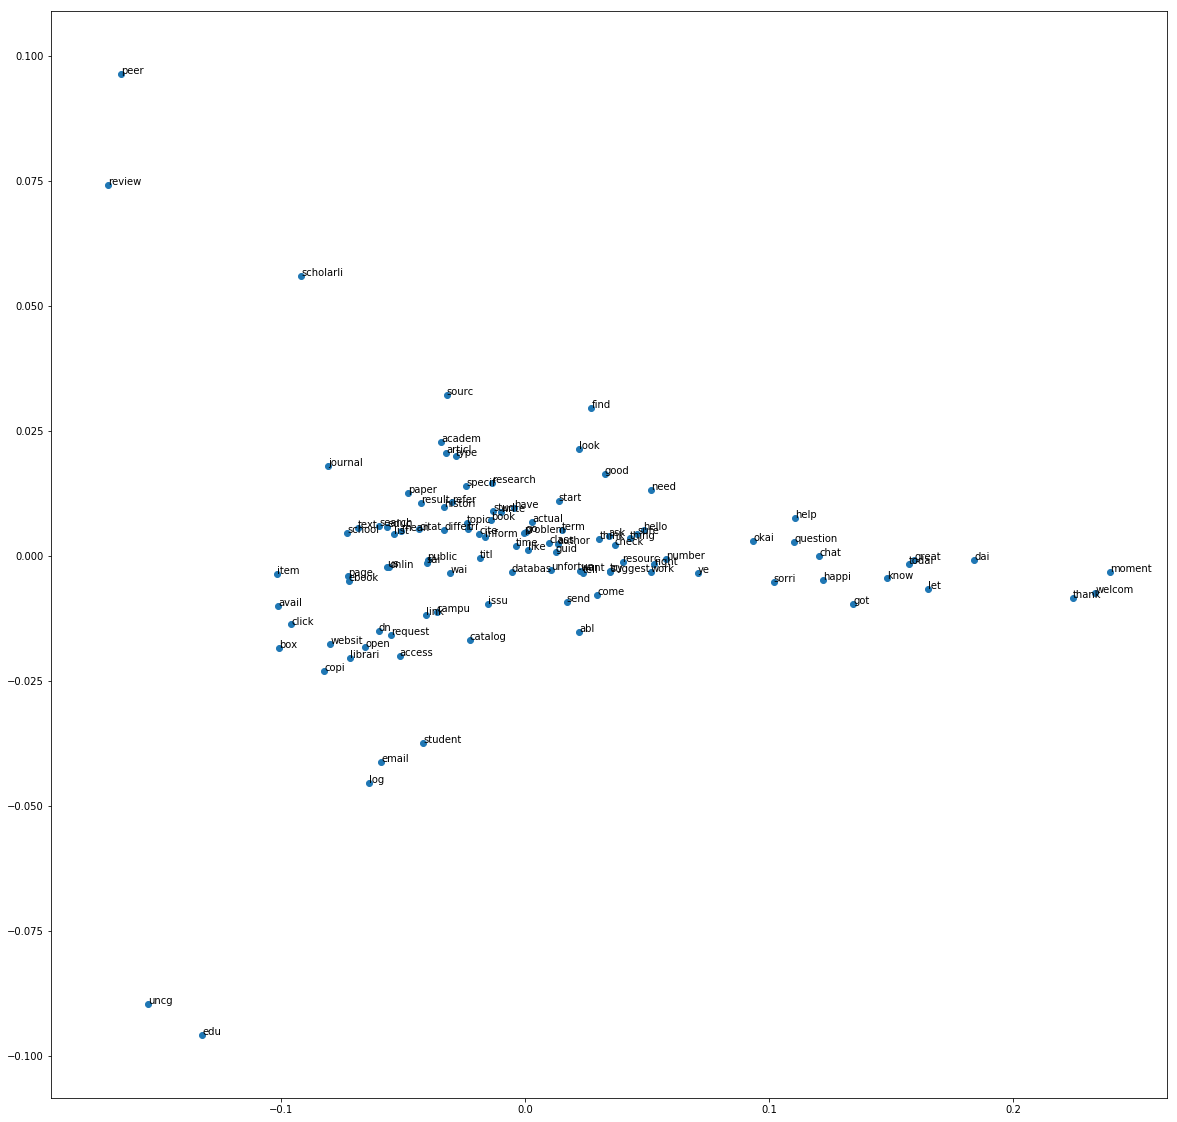

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

# choosing to work with very frequently used words, as the graph is very dense otherwise.
# also, working with the skip-gram model as opposed to the CBOW default
model = Word2Vec(proc_chat, min_count=75, sg=1)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.figure(figsize=(20,20))
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()